In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv('seat_matrix - Sheet1.csv')

# Show the first few rows
df.head()

,college_code,college_name,branch_code,branch_name,oc,bc,bcm,mbc,sc,sca,st,total,year,id
0,1,University Departments of Anna University Chen...,BY,BIO MEDICAL ENGINEERING (SS),19,17,3,13,9,2,1,64,2025,1
1,1,University Departments of Anna University Chen...,CE,CIVIL ENGINEERING,19,18,2,13,9,2,1,64,2025,2
2,1,University Departments of Anna University Chen...,CM,COMPUTER SCIENCE AND ENGINEERING (SS),40,33,4,25,19,4,1,126,2025,3
3,1,University Departments of Anna University Chen...,CS,COMPUTER SCIENCE AND ENGINEERING,19,17,2,13,9,2,1,63,2025,4
4,1,University Departments of Anna University Chen...,EC,ELECTRONICS AND COMMUNICATION ENGINEERING,19,17,2,13,9,2,1,63,2025,5


In [99]:
print(df.columns)

Index(['college_code', 'college_name', 'branch_code', 'branch_name', 'oc', 'bc', 'bcm', 'mbc', 'sc', 'sca', 'st', 'total', 'year', 'id'], dtype='object')


1. 📈 Year-wise Total Seats Comparison

Let's compare the total number of seats allocated in 2024 vs 2025.

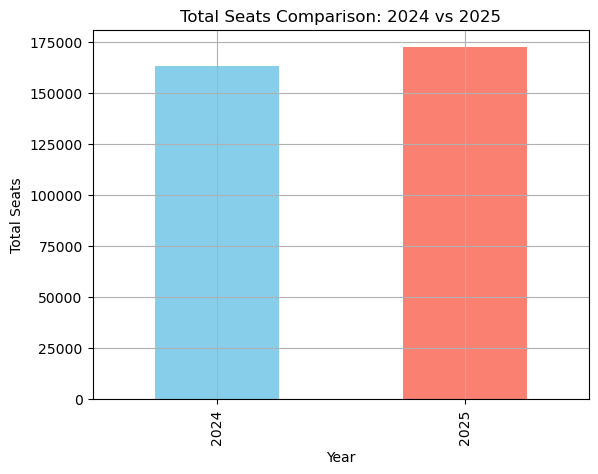

📊 Total Engineering Seats per Year:

year
2024    163175
2025    172388
Name: total, dtype: int64


In [100]:
yearwise_total = df.groupby('year')['total'].sum()
yearwise_total.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Total Seats Comparison: 2024 vs 2025')
plt.ylabel('Total Seats')
plt.xlabel('Year')
plt.grid(True)
plt.show()
print("📊 Total Engineering Seats per Year:\n")
print(yearwise_total)

2. 🏫 Top 10 Colleges by Total Seats (2025)

Which colleges offer the highest number of engineering seats in the year 2025?
This analysis helps identify institutions with the largest student intake, highlighting the top 10 colleges based on total seat availability for the current academic year.

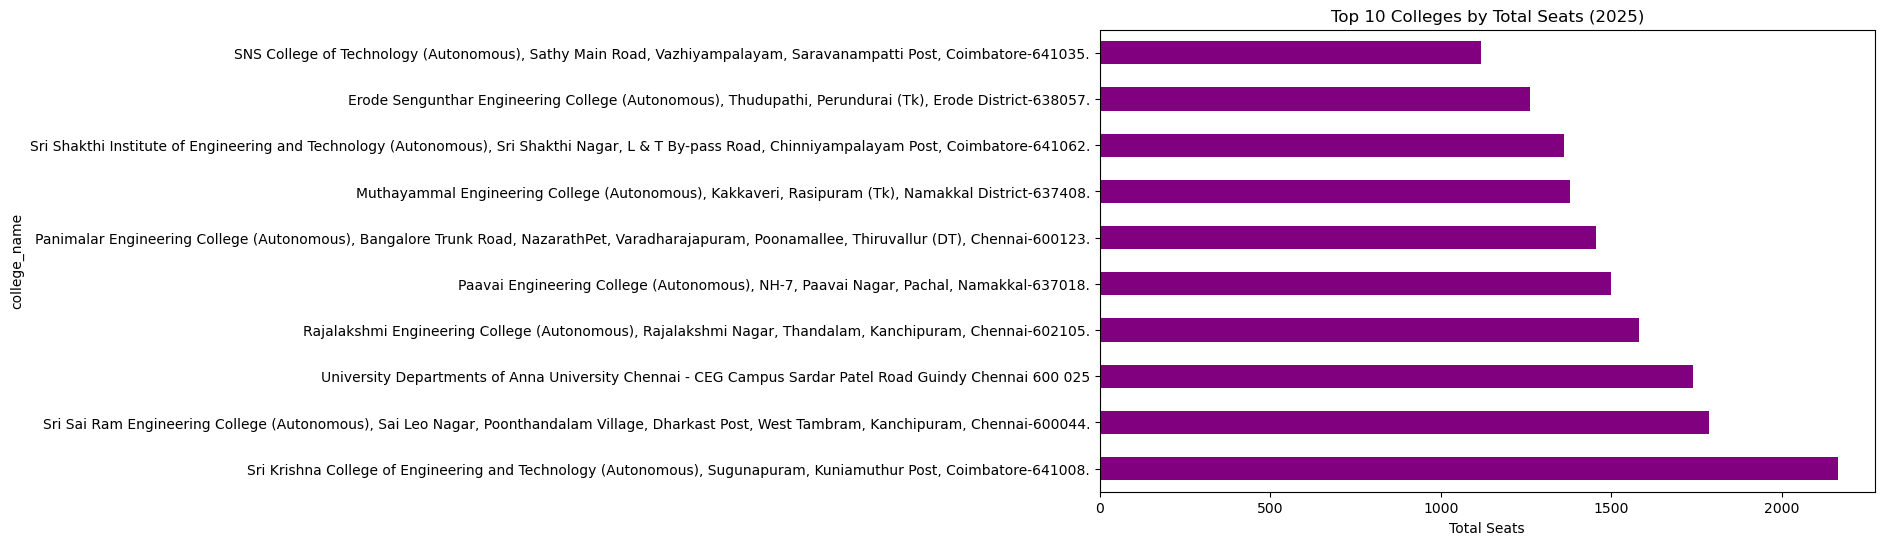

Top 10 Colleges by Total Seats (2025):

college_name
Sri Krishna College of Engineering and Technology (Autonomous), Sugunapuram, Kuniamuthur Post, Coimbatore-641008.                                     2164
Sri Sai Ram Engineering College (Autonomous), Sai Leo Nagar, Poonthandalam Village, Dharkast Post, West Tambram, Kanchipuram, Chennai-600044.         1786
University Departments of Anna University Chennai - CEG Campus Sardar Patel Road Guindy Chennai 600 025                                               1740
Rajalakshmi Engineering College (Autonomous), Rajalakshmi Nagar, Thandalam, Kanchipuram, Chennai-602105.                                              1582
Paavai Engineering College (Autonomous), NH-7, Paavai Nagar, Pachal, Namakkal-637018.                                                                 1498
Panimalar Engineering College (Autonomous), Bangalore Trunk Road, NazarathPet, Varadharajapuram, Poonamallee, Thiruvallur (DT), Chennai-600123.       1455
Muthayammal Engin

In [101]:
df_2025 = df[df['year'] == 2025]

top_colleges_2025 = df_2025.groupby('college_name')['total'].sum().sort_values(ascending=False).head(10)

top_colleges_2025.plot(kind='barh', figsize=(10,6), color='purple')
plt.title('Top 10 Colleges by Total Seats (2025)')
plt.xlabel('Total Seats')
plt.show()

print("Top 10 Colleges by Total Seats (2025):\n")
print(top_colleges_2025)

3. 🧠 Most Popular Branches (By Total Seats)
   
Which engineering branches had the most seats overall?

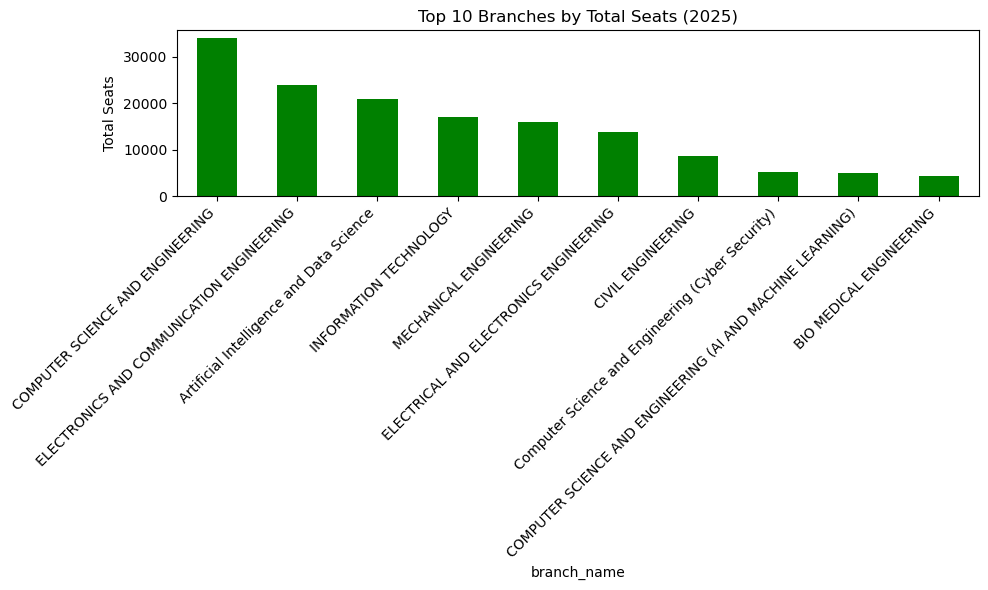

🌟 Top 10 Branches by Total Seats (2025):

branch_name
COMPUTER SCIENCE AND ENGINEERING                              33947
ELECTRONICS AND COMMUNICATION ENGINEERING                     23838
Artificial Intelligence and Data Science                      20857
INFORMATION TECHNOLOGY                                        17055
MECHANICAL ENGINEERING                                        15908
ELECTRICAL AND ELECTRONICS ENGINEERING                        13735
CIVIL ENGINEERING                                              8633
Computer Science and Engineering (Cyber Security)              5288
COMPUTER SCIENCE AND ENGINEERING (AI AND MACHINE LEARNING)     4990
BIO MEDICAL ENGINEERING                                        4412
Name: total, dtype: int64


In [113]:
top_branches_2025 = df[df['year'] == 2025].groupby('branch_name')['total'].sum().sort_values(ascending=False).head(10)

top_branches_2025.plot(kind='bar', figsize=(10,6), color='green')
plt.title('Top 10 Branches by Total Seats (2025)')
plt.ylabel('Total Seats')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("🌟 Top 10 Branches by Total Seats (2025):\n")
print(top_branches_2025)

4. 🆚 Branch-Wise Seat Comparison (2024 vs 2025)

Let’s visualize how seats have changed per branch from 2024 to 2025.

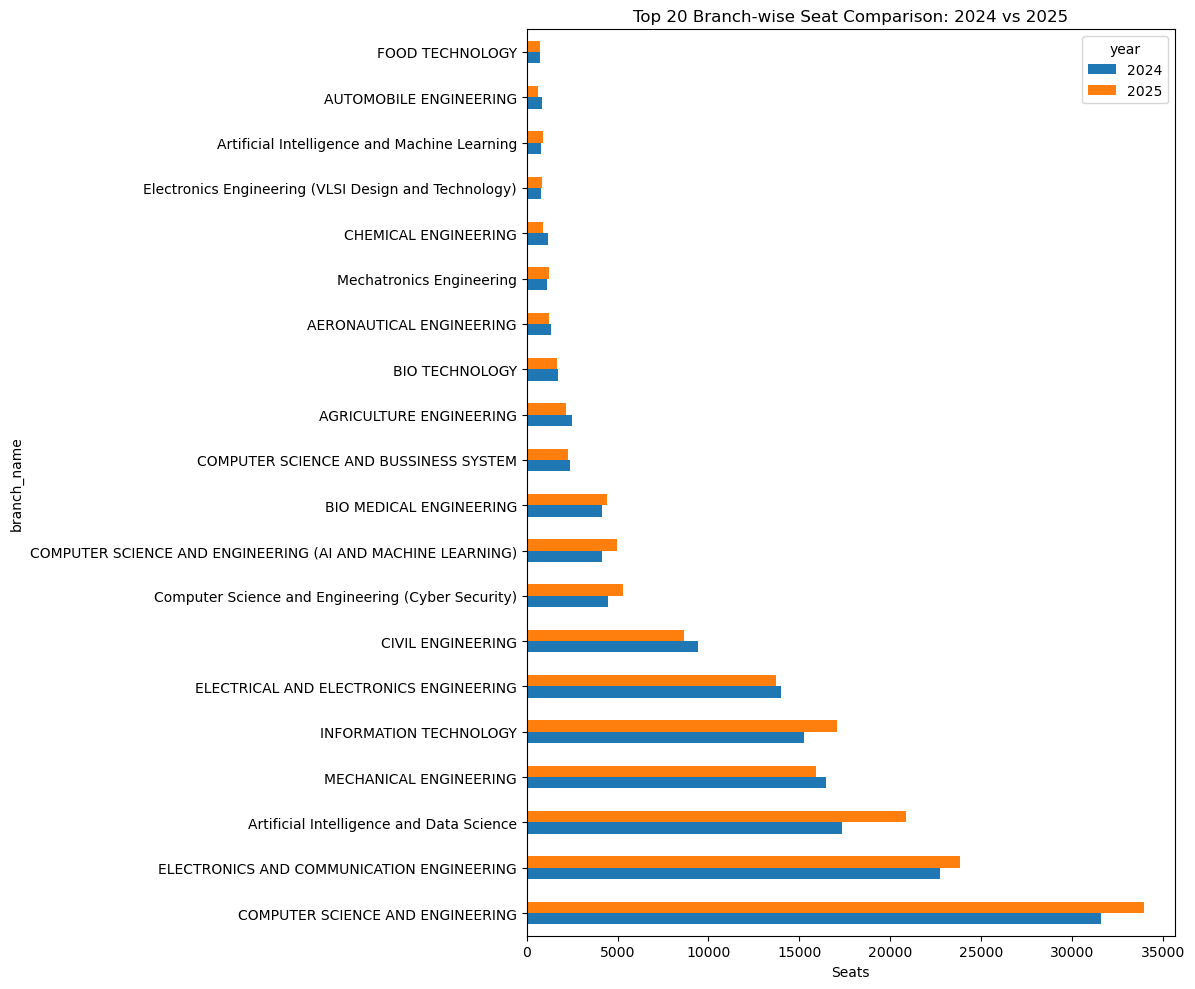

📊 Top 20 Branches by Seat Comparison (2024 vs 2025):

year                                                   2024     2025
branch_name                                                         
COMPUTER SCIENCE AND ENGINEERING                    31595.0  33947.0
ELECTRONICS AND COMMUNICATION ENGINEERING           22715.0  23838.0
Artificial Intelligence and Data Science            17331.0  20857.0
MECHANICAL ENGINEERING                              16466.0  15908.0
INFORMATION TECHNOLOGY                              15262.0  17055.0
ELECTRICAL AND ELECTRONICS ENGINEERING              13971.0  13735.0
CIVIL ENGINEERING                                    9402.0   8633.0
Computer Science and Engineering (Cyber Security)    4480.0   5288.0
COMPUTER SCIENCE AND ENGINEERING (AI AND MACHIN...   4167.0   4990.0
BIO MEDICAL ENGINEERING                              4147.0   4412.0
COMPUTER SCIENCE AND BUSSINESS SYSTEM                2400.0   2285.0
AGRICULTURE ENGINEERING                          

In [103]:
yearwise = df.pivot_table(index='branch_name', columns='year', values='total', aggfunc='sum')
yearwise.fillna(0, inplace=True)

top_branches = yearwise.sum(axis=1).sort_values(ascending=False).head(20)

yearwise.loc[top_branches.index].plot(kind='barh', figsize=(12, 10))
plt.title("Top 20 Branch-wise Seat Comparison: 2024 vs 2025")
plt.xlabel("Seats")
plt.tight_layout()
plt.show()

print("📊 Top 20 Branches by Seat Comparison (2024 vs 2025):\n")
print(yearwise.loc[top_branches.index])

5. 📊 Category-wise Distribution of Seats (2025 only)

Let's check how seats are distributed across reservation categories for the latest year.

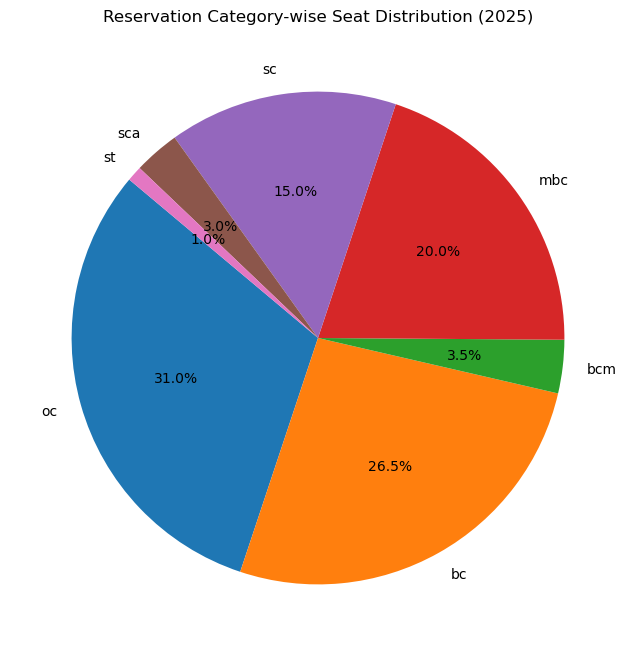

🔢 Total Seats by Reservation Category (2025):

oc     53440
bc     45683
mbc    34478
sc     25857
bcm     6033
sca     5174
st      1725
dtype: int64


In [104]:
df_2025 = df[df['year'] == 2025]
category_totals = df_2025[['oc', 'bc', 'bcm', 'mbc', 'sc', 'sca', 'st']].sum()
category_totals.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(8, 8))
plt.title('Reservation Category-wise Seat Distribution (2025)')
plt.ylabel('')
plt.show()
print("🔢 Total Seats by Reservation Category (2025):\n")
print(category_totals.sort_values(ascending=False))

6. 🔺 Seat Change Detection (Branch-wise: Increase)

Find branches where seat count increased from 2024 to 2025.

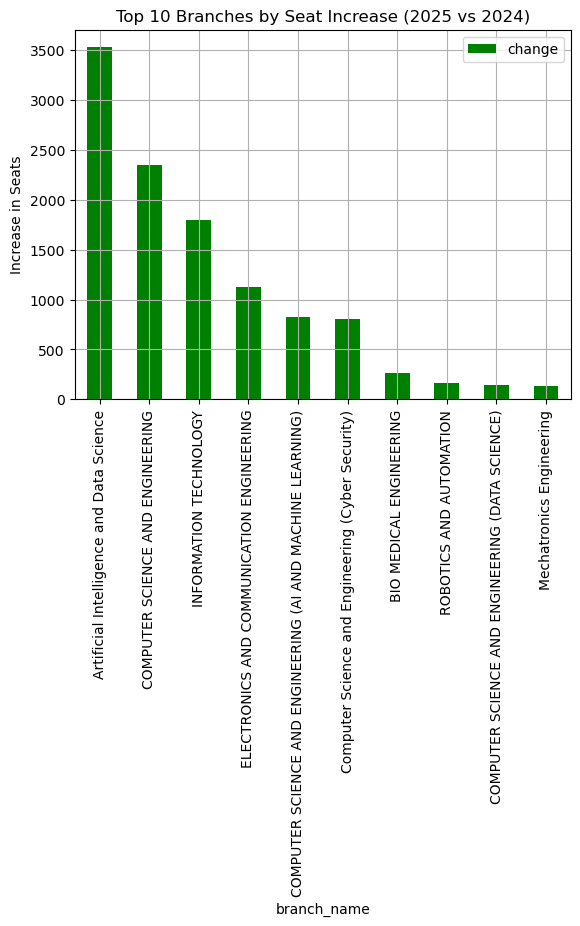

🔺Top 10 Branches with Highest Seat Increase:

year                                                change
branch_name                                               
Artificial Intelligence and Data Science            3526.0
COMPUTER SCIENCE AND ENGINEERING                    2352.0
INFORMATION TECHNOLOGY                              1793.0
ELECTRONICS AND COMMUNICATION ENGINEERING           1123.0
COMPUTER SCIENCE AND ENGINEERING (AI AND MACHIN...   823.0
Computer Science and Engineering (Cyber Security)    808.0
BIO MEDICAL ENGINEERING                              265.0
ROBOTICS AND AUTOMATION                              162.0
COMPUTER SCIENCE AND ENGINEERING (DATA SCIENCE)      140.0
Mechatronics Engineering                             129.0


In [105]:
pivot = df.pivot_table(index='branch_name', columns='year', values='total', aggfunc='sum')
pivot = pivot.dropna()
pivot['change'] = pivot[2025] - pivot[2024]  

increased = pivot[pivot['change'] > 0].sort_values('change', ascending=False).head(10)
increased.plot(kind='bar', y='change', color='green')
plt.title('Top 10 Branches by Seat Increase (2025 vs 2024)')
plt.ylabel('Increase in Seats')
plt.grid(True)
plt.show()

print("🔺Top 10 Branches with Highest Seat Increase:\n")
print(increased[['change']])

7. 🔁 Seat Change Detection (Branch-wise: Decrease)

Find branches where seat count decreased from 2024 to 2025.

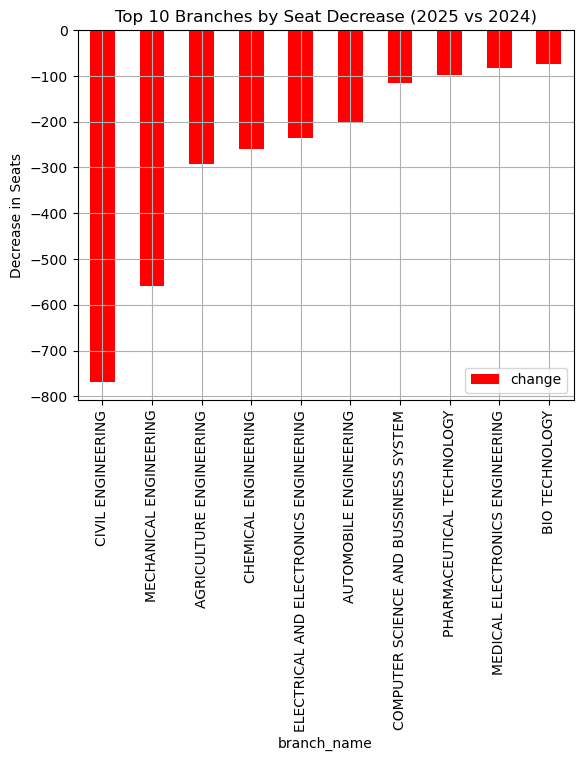

🔻 Top 10 Branches with Highest Seat Decrease:

year                                    change
branch_name                                   
CIVIL ENGINEERING                       -769.0
MECHANICAL ENGINEERING                  -558.0
AGRICULTURE ENGINEERING                 -292.0
CHEMICAL ENGINEERING                    -259.0
ELECTRICAL AND ELECTRONICS ENGINEERING  -236.0
AUTOMOBILE ENGINEERING                  -200.0
COMPUTER SCIENCE AND BUSSINESS SYSTEM   -115.0
PHARMACEUTICAL TECHNOLOGY                -97.0
MEDICAL ELECTRONICS ENGINEERING          -82.0
BIO TECHNOLOGY                           -75.0


In [106]:
pivot = df.pivot_table(index='branch_name', columns='year', values='total', aggfunc='sum')
pivot = pivot.dropna()
pivot['change'] = pivot[2025] - pivot[2024]  

decreased = pivot[pivot['change'] < 0].sort_values('change').head(10)
decreased.plot(kind='bar', y='change', color='red')
plt.title('Top 10 Branches by Seat Decrease (2025 vs 2024)')
plt.ylabel('Decrease in Seats')
plt.grid(True)
plt.show()

print("🔻 Top 10 Branches with Highest Seat Decrease:\n")
print(decreased[['change']])

8. 🏫 College-wise Seat Trends (Example: GCT, MIT, etc.)

Let’s focus on specific colleges to see how their seat allocation changed.

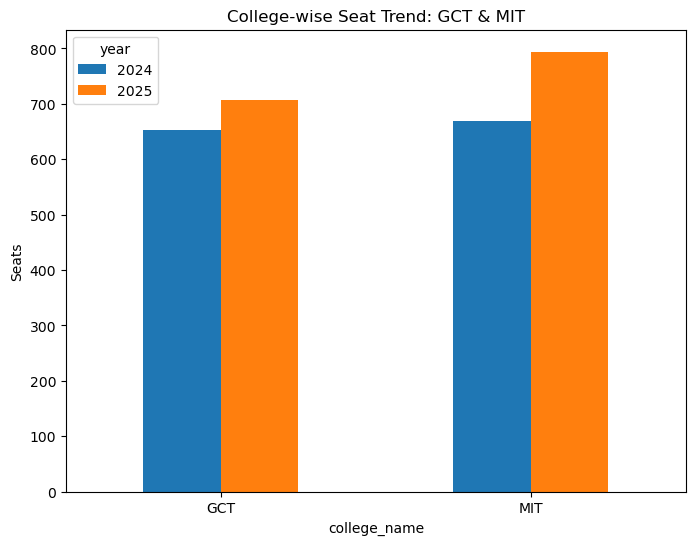

🏫 GCT vs MIT Total Seats (2024 vs 2025):

year          2024  2025
college_name            
GCT            653   707
MIT            669   794


In [107]:
target_colleges = [
    'Government College of Technology (Autonomous) Thadagam Road Coimbatore District 641013',
    'University Departments of Anna University Chennai - MIT Campus Chrompet Tambaram Taluk Chengalpattu District 600 044'
]

filtered = df[df['college_name'].isin(target_colleges)].copy()

# Replace full names with short names
name_map = {
    'Government College of Technology (Autonomous) Thadagam Road Coimbatore District 641013': 'GCT',
    'University Departments of Anna University Chennai - MIT Campus Chrompet Tambaram Taluk Chengalpattu District 600 044': 'MIT'
}

filtered['college_name'] = filtered['college_name'].replace(name_map)

pivot = filtered.groupby(['college_name', 'year'])['total'].sum().unstack()

pivot.plot(kind='bar', figsize=(8,6))
plt.title("College-wise Seat Trend: GCT & MIT")
plt.ylabel("Seats")
plt.xticks(rotation=0)
plt.show()
print("🏫 GCT vs MIT Total Seats (2024 vs 2025):\n")
print(pivot)

9. 📊 Heatmap for Category-wise Allocation by Branch (Optional Bonus)

This heatmap shows how seats are distributed across categories per branch.

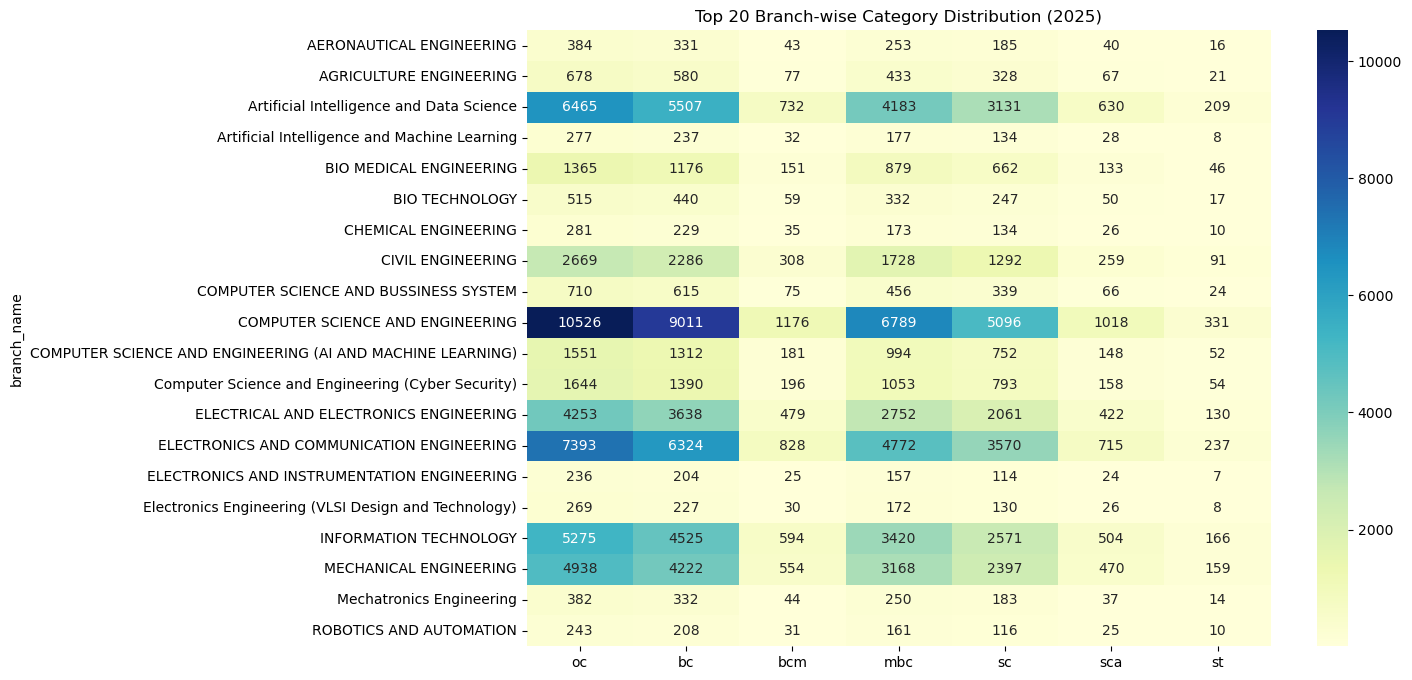

📊 Category-Wise Seat Distribution for Top 20 Branches (2025):

                                                       oc    bc   bcm   mbc    sc   sca   st
branch_name                                                                                 
AERONAUTICAL ENGINEERING                              384   331    43   253   185    40   16
AGRICULTURE ENGINEERING                               678   580    77   433   328    67   21
Artificial Intelligence and Data Science             6465  5507   732  4183  3131   630  209
Artificial Intelligence and Machine Learning          277   237    32   177   134    28    8
BIO MEDICAL ENGINEERING                              1365  1176   151   879   662   133   46
BIO TECHNOLOGY                                        515   440    59   332   247    50   17
CHEMICAL ENGINEERING                                  281   229    35   173   134    26   10
CIVIL ENGINEERING                                    2669  2286   308  1728  1292   259   91
COMPUTE

In [108]:
import seaborn as sns

branch_totals = df[df['year'] == 2025].groupby('branch_name')['total'].sum().sort_values(ascending=False).head(20).index

category_df = df[(df['year'] == 2025) & (df['branch_name'].isin(branch_totals))]\
    .groupby('branch_name')[['oc', 'bc', 'bcm', 'mbc', 'sc', 'sca', 'st']].sum()

plt.figure(figsize=(12, 8))
sns.heatmap(category_df, cmap="YlGnBu", annot=True, fmt='d')
plt.title('Top 20 Branch-wise Category Distribution (2025)')
plt.show()
import pandas as pd
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', 20)

print("📊 Category-Wise Seat Distribution for Top 20 Branches (2025):\n")
print(category_df)


10. 📊 Seats Trend in Emerging Tech Branches (2024 vs 2025)
   
With rapid advancements in technology, engineering branches like Artificial Intelligence, Data Science, Cyber Security, and IoT have become highly sought after.
This plot shows the total number of seats allocated for such modern tech branches across Tamil Nadu in 2024 and 2025.

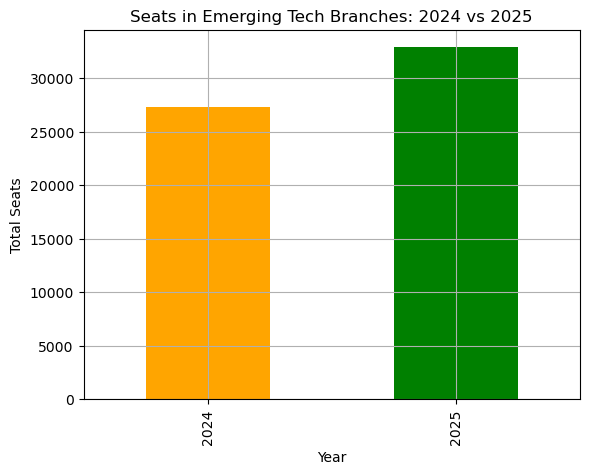

🚀 Seats in Emerging Tech Branches (2024 vs 2025):

year
2024    27316
2025    32890
Name: total, dtype: int64


In [109]:
keywords = ['Artificial', 'Data', 'Cyber', 'IoT', 'AI', 'Machine Learning', 'ML', 'DS', 'Business System']

df_emerging = df[df['branch_name'].str.contains('|'.join(keywords), case=False)]

emerging_trend = df_emerging.groupby('year')['total'].sum()

emerging_trend.plot(kind='bar', color=['orange', 'green'])
plt.title("Seats in Emerging Tech Branches: 2024 vs 2025")
plt.ylabel("Total Seats")
plt.xlabel("Year")
plt.grid(True)
plt.show()
print("🚀 Seats in Emerging Tech Branches (2024 vs 2025):\n")
print(emerging_trend)

11. 🏫 Top 10 Colleges by Branch Variety (2025)
    
Some colleges offer a wide range of engineering programs to cater to diverse student interests.
This chart highlights the top 10 colleges in Tamil Nadu with the most number of unique branches offered in 2025.

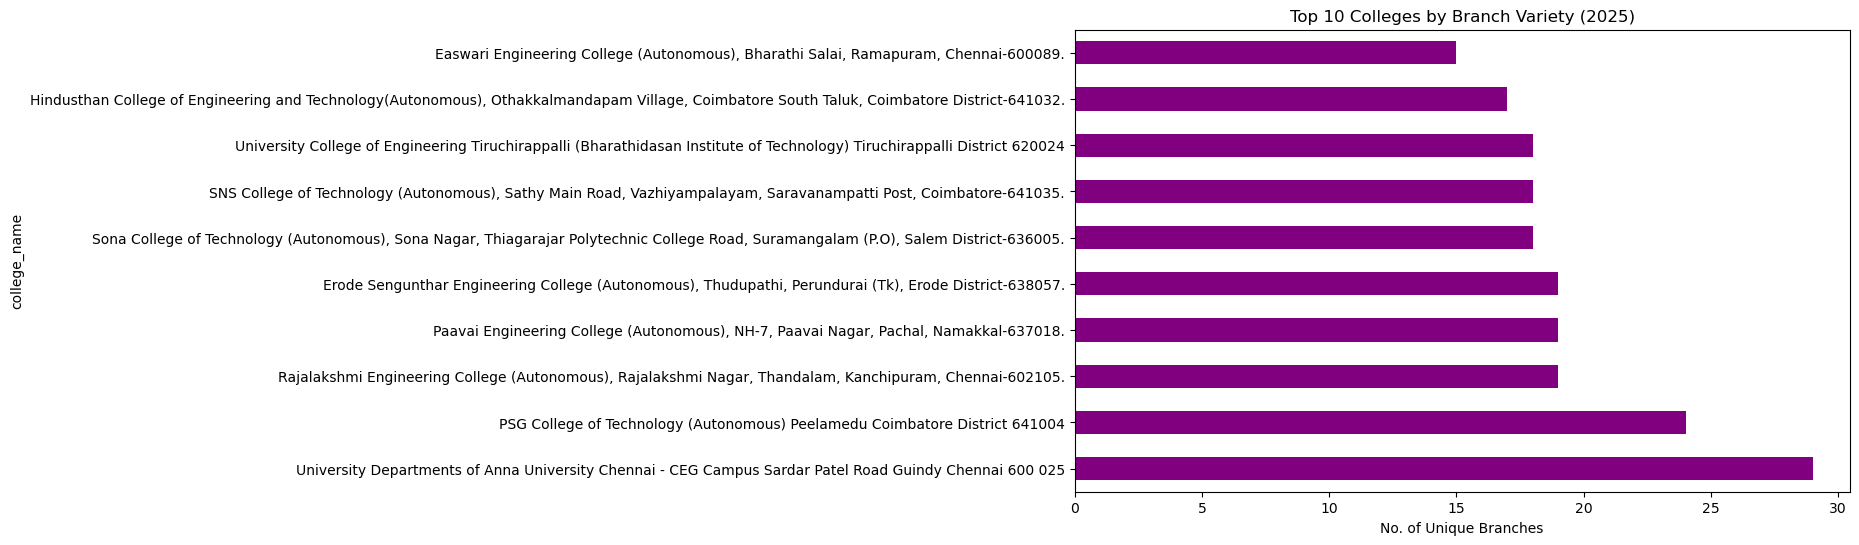

🏫 Top 10 Colleges by Number of Unique Branches in 2025:

college_name
University Departments of Anna University Chennai - CEG Campus Sardar Patel Road Guindy Chennai 600 025                                        29
PSG College of Technology (Autonomous) Peelamedu Coimbatore District 641004                                                                    24
Rajalakshmi Engineering College (Autonomous), Rajalakshmi Nagar, Thandalam, Kanchipuram, Chennai-602105.                                       19
Paavai Engineering College (Autonomous), NH-7, Paavai Nagar, Pachal, Namakkal-637018.                                                          19
Erode Sengunthar Engineering College (Autonomous), Thudupathi, Perundurai (Tk), Erode District-638057.                                         19
Sona College of Technology (Autonomous), Sona Nagar, Thiagarajar Polytechnic College Road, Suramangalam (P.O), Salem District-636005.          18
SNS College of Technology (Autonomous), Sathy Main Roa

In [110]:
# Filter 2025 data
df_2025 = df[df['year'] == 2025]

# Count unique branches per college
branch_counts = df_2025.groupby('college_name')['branch_name'].nunique().sort_values(ascending=False).head(10)

# Plot
branch_counts.plot(kind='barh', figsize=(10,6), color='purple')
plt.title("Top 10 Colleges by Branch Variety (2025)")
plt.xlabel("No. of Unique Branches")
plt.show()
print("🏫 Top 10 Colleges by Number of Unique Branches in 2025:\n")
print(branch_counts)

12. 💻 Total Seats in CS-Related Branches (2024 vs 2025)
    
Computer Science and related fields have become the backbone of modern education and tech industry demands.
This analysis compares the total number of seats allocated in Tamil Nadu for all CS-related branches

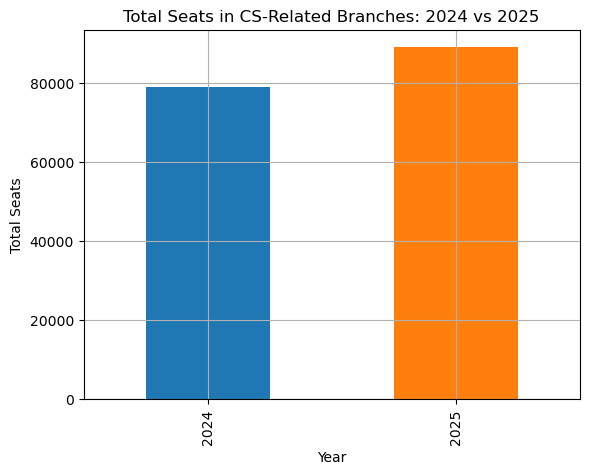

💻 Total CS-Related Seats by Year:
year
2024    78981
2025    88922
Name: total, dtype: int64


In [111]:
import re

cs_keywords = [
    'Computer Science',
    'Information Technology',
    'Artificial Intelligence',
    'AI and Machine Learning',
    'Data Science',
    'Cyber Security',
    'Computer and Communication',
    'Computer Science and Business System',
    'Computer Science and Design',
    'Internet of Things',
    'Electronics and Computer Engineering',
    'Electrical and Computer Engineering',
    'Computer Science and Technology',
    'Computer Science and Engineering (Tamil)',
]

# Escape special characters in keywords
escaped_keywords = [re.escape(k) for k in cs_keywords]

# Filter CS-related branches
df_cs = df[df['branch_name'].str.contains('|'.join(escaped_keywords), case=False, regex=True)]

cs_seats_by_year = df_cs.groupby('year')['total'].sum()

cs_seats_by_year.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title("Total Seats in CS-Related Branches: 2024 vs 2025")
plt.ylabel("Total Seats")
plt.xlabel("Year")
plt.grid(True)
plt.show()

print("💻 Total CS-Related Seats by Year:")
print(cs_seats_by_year)

✅ Newly Added Branches in 2025:

In [112]:
branches_2024 = df[df['year'] == 2024]['branch_name'].unique()
branches_2025 = df[df['year'] == 2025]['branch_name'].unique()

new_branches = set(branches_2025) - set(branches_2024)
print("✅ Newly Added Branches in 2025:\n")
for b in new_branches:
    print(b)


✅ Newly Added Branches in 2025:

ENVIRONMENTAL SCIENCE & TECHNOLOGY
ROBOTICS AND ARTIFICIAL INTELLIGENCE
CHEMICAL AND ELECTRO CHEMICAL ENGINEERING
COMPUTER SCIENCE AND ENGINEERING(ARTIFICIAL INTELLIGENCE)
